In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()#data frame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Amount distribution')

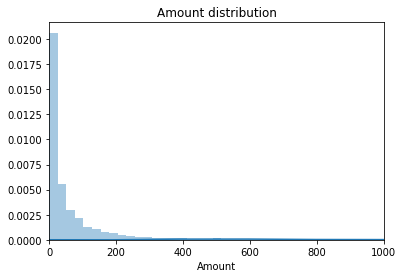

In [5]:
sns.distplot(df.Amount, bins=1000)
plt.xlim(0,1000)
plt.title('Amount distribution')

In [6]:
df= df.sample(frac=0.1, random_state = 48)
print(df.shape)
print(df.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [13]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
Lrc = LogisticRegression().fit(X_train, y_train)

In [12]:
cross_val_score(Lrc, X, y, cv= 10)

array([0.998245  , 0.999649  , 0.999649  , 0.999649  , 0.999298  ,
       1.        , 0.99929751, 1.        , 0.99964875, 1.        ])

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
Lrc.coef_   #conveys which parameter is  more important

array([[-8.20421578e-05,  2.33489606e-02, -3.85401028e-01,
        -1.17295973e+00,  1.45039139e-01, -2.11622353e-01,
        -1.87450248e-01, -2.07197010e-02, -1.77170237e-01,
        -4.22577169e-01, -2.98279004e-01, -1.73933757e-01,
        -3.32500498e-01, -1.83307532e-01, -8.01694389e-01,
        -5.89220245e-01, -5.44452831e-01, -8.96851681e-01,
        -1.79286933e-01,  1.19861846e-02,  6.05056294e-02,
         6.13112944e-01,  2.59906526e-01,  1.30185413e-01,
        -2.52839500e-02, -3.66126825e-01,  1.54461325e-01,
        -2.91998579e-01,  1.81135635e-01, -2.91203564e-02]])

In [16]:
lr_pred = Lrc.predict(X_test)

In [14]:
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[9375    0]
 [   3   21]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9375
           1       1.00      0.88      0.93        24

    accuracy                           1.00      9399
   macro avg       1.00      0.94      0.97      9399
weighted avg       1.00      1.00      1.00      9399



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
y = df.Class
X = df.drop('Class', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [20]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
cross_val_score(Rfc.fit(X_train, y_train), X, y, cv= 10)

array([0.998947  , 0.999649  , 0.999649  , 0.999649  , 0.999298  ,
       0.99929775, 0.99964875, 0.99929751, 0.99964875, 1.        ])

In [23]:
lr_pred = Rfc.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

NameError: name 'confusion_matrix' is not defined

In [24]:
rf_pred = Rfc.predict(X_test)

In [26]:
import sklearn
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [29]:
svc = SVC()

y = df.Class
X = df.drop(df[['Class']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [30]:
ss = StandardScaler().fit_transform(X_train)

In [31]:
sklearn_pca = sklearn.decomposition.PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(ss)
X_PCA = pd.DataFrame(Y_sklearn)
print( 'The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n', sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.06153247 0.05667294 0.04890891 0.03844345 0.03602705]


In [32]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [33]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [34]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   5.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   5.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.998, total=   5.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   4.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   5.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.998, total=   5.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.998, total=   5.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.998, total=   5.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.998, total=   5.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.998, total=  41.5s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.998, total=  38.5s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.998, total=  33.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.998, total=  37.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.998, total=  34.7s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.998, total=  19.7s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.998, total=  20.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 25.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
grid_pred = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[14214     1]
 [    4    22]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       0.96      0.85      0.90        26

    accuracy                           1.00     14241
   macro avg       0.98      0.92      0.95     14241
weighted avg       1.00      1.00      1.00     14241



# KNN

In [31]:
from sklearn import neighbors

In [32]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [40]:
cross_val_score(knn.fit(X_train, y_train), X, y, cv=6)

array([0.99957877, 0.99915754, 0.99978934, 0.9997893 , 1.        ,
       1.        ])

In [41]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],'weights':['uniform','distance']}

In [42]:
KNN = neighbors.KNeighborsClassifier()

In [43]:
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [44]:
grid.fit(X_train, y_train)

C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=1.000, total=   2.7s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=1.000, total=   2.2s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=1.000, total=   2.7s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=1.000, total=   2.6s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=1.000, total=   1.9s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=1.000, total=   2.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   3.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   2.9s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   3.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[CV] ..... n_neighbors=75, weights=uniform, score=0.998, total=   6.1s
[CV] n_neighbors=75, weights=uniform .................................
[CV] ..... n_neighbors=75, weights=uniform, score=0.998, total=   5.5s
[CV] n_neighbors=75, weights=uniform .................................
[CV] ..... n_neighbors=75, weights=uniform, score=0.998, total=   5.9s
[CV] n_neighbors=75, weights=distance ................................
[CV] .... n_neighbors=75, weights=distance, score=0.998, total=   5.7s
[CV] n_neighbors=75, weights=distance ................................
[CV] .... n_neighbors=75, weights=distance, score=0.998, total=   5.3s
[CV] n_neighbors=75, weights=distance ................................
[CV] .... n_neighbors=75, weights=distance, score=0.998, total=   5.6s
[CV] n_neighbors=100, weights=uniform ................................
[CV] .... n_neighbors=100, weights=uniform, score=0.998, total=   6.1s
[CV] n_neighbors=100, weights=uniform ................................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  5.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20, 25, 30, 40, 50,
                                         75, 100],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [45]:
grid_pred = grid.predict(X_test)

In [46]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[14207     3]
 [    3    28]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14210
           1       0.90      0.90      0.90        31

    accuracy                           1.00     14241
   macro avg       0.95      0.95      0.95     14241
weighted avg       1.00      1.00      1.00     14241

